# Problem statement: 
Spam is a major problem for users. It can be time-consuming and annoying to filter out spam messages, and it can also be a security risk.

The objective of this project is to develop a spam classifier that can be used to automatically classify messages as spam or ham (not spam). This can help users to quickly and easily identify and filter out spam messages.


In [48]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb

In [49]:
# Reading data
df = pd.read_csv(r"C:\Users\prasa\Dropbox\PC\Desktop\ML-Projects\Portfolio\SMS spam detection\spam.csv",encoding='latin8')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [50]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [51]:
# Considering only the V1 and V2 columns.
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.sample(3)

,v1,v2
197,ham,is your hamster dead? Hey so tmr i meet you at...
2037,ham,Oh sorry please its over
942,spam,How about getting in touch with folks waiting ...


In [52]:
# Renaming the columns 
df.rename({
    'v1': 'target',
    'v2': 'sms'
},axis=1,inplace=True)


In [53]:
df.sample(2)

,target,sms
2784,ham,"K, wat s tht incident?"
189,ham,I jus reached home. I go bathe first. But my s...


In [54]:
# Checking the shaoe of the data frame
df.shape

(5572, 2)

<AxesSubplot:>

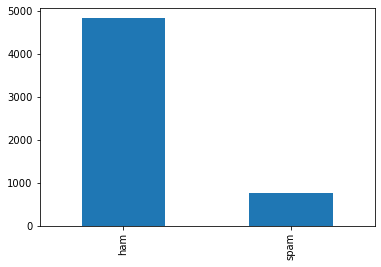

In [55]:
# Analysing the target variable
df['target'].value_counts().plot(kind='bar')

Data is imbalanced. This should be remembered while checking the accuracy of the model.


In [56]:
# Encoding the Spam message as 1 and ham message as 0
df['target'] = df['target'].replace({'spam':1,
          'ham':0})
df.sample(3)

,target,sms
3657,0,R u here yet? I'm wearing blue shirt n black p...
5087,0,"Good morning, im suffering from fever and dyse..."
4423,0,Update your face book status frequently :)


# Extracting some additional features from the text

In [57]:

# 1. Charecters count: No of charecters in the given SMS
df['charecters_count'] = df['sms'].apply(lambda x: len(x))
df.sample(3)

,target,sms,charecters_count
4485,0,have * good weekend.,20
1940,0,Dude avatar 3d was imp. At one point i thought...,124
500,0,"Fighting with the world is easy, u either win ...",149


In [58]:
# 2. Words count: NO of words present in the SMS
df['words_count'] = df['sms'].apply(lambda x: len(x.split(" ")))
df.sample(3)

,target,sms,charecters_count,words_count
3216,0,Come to mahal bus stop.. &lt;DECIMAL&gt;,40,6
3756,1,YES! The only place in town to meet exciting a...,109,22
5112,1,December only! Had your mobile 11mths+? You ar...,159,28


In [59]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [60]:
# 3. Sentence_count: No of sentences in the message:
df['sentences_count'] = df['sms'].apply(lambda x:len(sent_tokenize(x)))
df.sample(3)

,target,sms,charecters_count,words_count,sentences_count
514,1,"You are guaranteed the latest Nokia Phone, a 4...",148,25,3
4446,0,Please tell me you have some of that special s...,73,14,1
3013,0,I might go 2 sch. Yar at e salon now v boring.,46,12,2


# Performing EDA
To understand the importance of our newly extracted features.

In [61]:
df[['words_count','sentences_count','charecters_count','target']].corr()

,words_count,sentences_count,charecters_count,target
words_count,1.000000,0.649647,0.974318,0.285458
sentences_count,0.649647,1.000000,0.646715,0.290500
charecters_count,0.974318,0.646715,1.000000,0.387285
target,0.285458,0.290500,0.387285,1.000000


All the three features are having positive correlation with the target variable. charecters_count variable is having high correlation comparing to other variables.

<AxesSubplot:xlabel='sentences_count', ylabel='Density'>

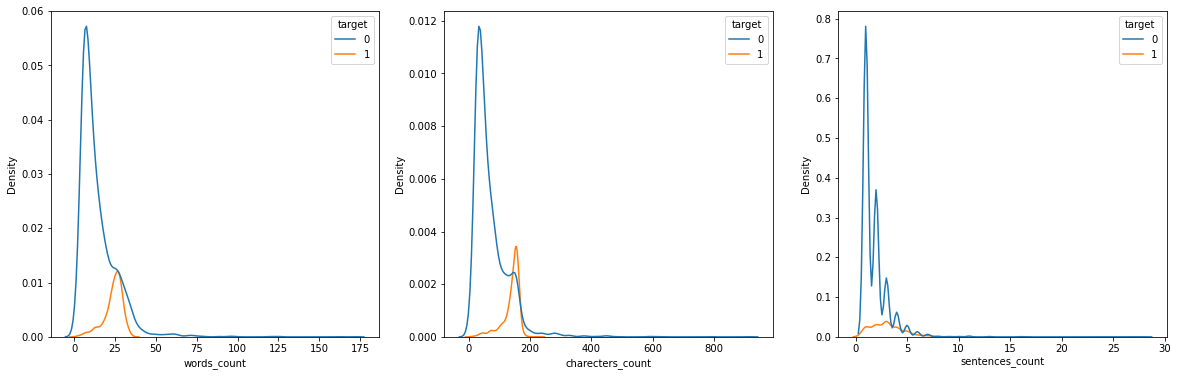

In [62]:
fig, axis = plt.subplots(nrows=1, ncols=3,sharex=False, sharey=False,figsize=(20,6))
sb.kdeplot(data=df,x='words_count',hue='target',ax=axis[0])
sb.kdeplot(data=df,x='charecters_count',hue='target',ax=axis[1])
sb.kdeplot(data=df,x='sentences_count',hue='target',ax=axis[2])

In [63]:
df[df['target']==1][['words_count','sentences_count','charecters_count','target']].describe()

,words_count,sentences_count,charecters_count,target
count,747.000000,747.000000,747.000000,747.0
mean,23.892905,3.017403,138.866131,1.0
std,5.826977,1.528449,29.183082,0.0
min,2.000000,1.000000,13.000000,1.0
25%,22.000000,2.000000,132.500000,1.0
50%,25.000000,3.000000,149.000000,1.0
75%,28.000000,4.000000,157.000000,1.0
max,35.000000,8.000000,224.000000,1.0


In [64]:
df[df['target']==0][['words_count','sentences_count','charecters_count','target']].describe()

,words_count,sentences_count,charecters_count,target
count,4825.000000,4825.000000,4825.000000,4825.0
mean,14.323938,1.808705,71.023627,0.0
std,11.538966,1.328227,58.016023,0.0
min,1.000000,1.000000,2.000000,0.0
25%,7.000000,1.000000,33.000000,0.0
50%,11.000000,1.000000,52.000000,0.0
75%,19.000000,2.000000,92.000000,0.0
max,171.000000,28.000000,910.000000,0.0


By analysing the above results it is clear that, the average no of words, charecters and sentences in the spam messages are > non spam messages. 

In [65]:
# SMS text preprocessing:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import string

ps = PorterStemmer()
lem = WordNetLemmatizer()
stop_words = stopwords.words('english')

def preprocess(sms):
    # Converting the text to lower case
    sms = sms.lower()
    sms= word_tokenize(sms)
    # Keeping only the alphanumeric part of the text
    y = []
    for i in sms:
        if i.isalnum():
            y.append(i)
    preprocessed_sms = y[:]
    y.clear()
    
    # Performing stemming after removing the stopwords
    for i in preprocessed_sms:
        if i not in stop_words and i not in string.punctuation:
            y.append(ps.stem(i))
    preprocessed_sms = y[:]
    y.clear()
    return " ".join(preprocessed_sms)
    
   


In [66]:
df['processed_text'] = df['sms'].apply(preprocess)
df.sample(3)

,target,sms,charecters_count,words_count,sentences_count,processed_text
5253,0,Please tell me not all of my car keys are in y...,55,13,1,pleas tell car key purs
179,0,Hi! You just spoke to MANEESHA V. We'd like to...,126,25,3,hi spoke maneesha like know satisfi experi rep...
4867,0,"Watching cartoon, listening music &amp; at eve...",92,16,1,watch cartoon listen music amp eve go templ am...


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


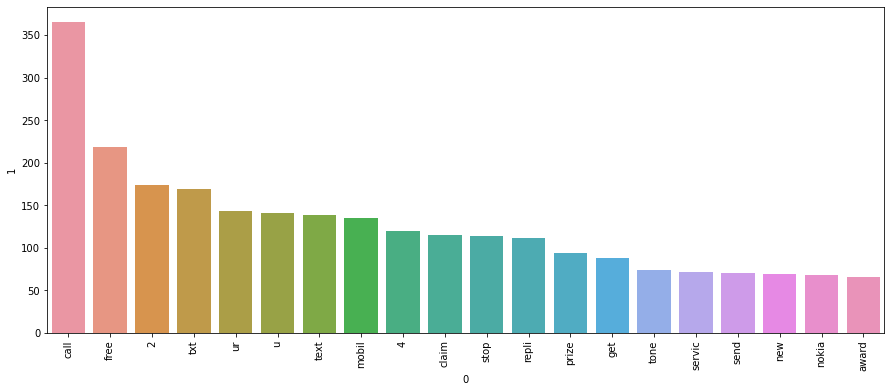

In [67]:
# Get idea about the frequent words appeared in Spam and Ham messages
listed_sentences = df[df['target']==1]['processed_text'].tolist()
words = []
for sent in listed_sentences:
    for word in sent.split(" "):
        words.append(word)

from collections import Counter
words_frequency = pd.DataFrame(Counter(words).most_common(20))
plt.figure(figsize=(15,6))
sb.barplot(words_frequency[0],words_frequency[1])
plt.xticks(rotation='vertical')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


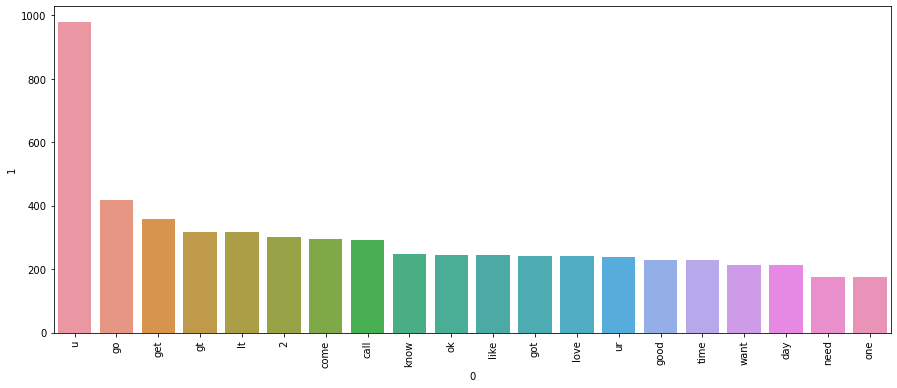

In [68]:
# Get idea about the frequent words appeared in Spam and Ham messages
listed_sentences = df[df['target']==0]['processed_text'].tolist()
words = []
for sent in listed_sentences:
    for word in sent.split(" "):
        words.append(word)

from collections import Counter
words_frequency = pd.DataFrame(Counter(words).most_common(20))
plt.figure(figsize=(15,6))
sb.barplot(words_frequency[0],words_frequency[1])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
# Converting all the words into vectors:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [297]:
#cv = CountVectorizer(max_features=2500)
cv = TfidfVectorizer(max_features=2500)

In [298]:
df_additional_features = df[['words_count','sentences_count','charecters_count']]

In [299]:
X = df['processed_text']
y = df['target']


In [300]:
# Converting words into vectors using BOW technique
X = cv.fit_transform(X)
X = pd.DataFrame(X.toarray())

In [301]:
X = pd.concat([df_additional_features,X],axis=1)
X.shape

(5572, 2503)

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [303]:
# Dividing the train and test splits 
X.columns = X.columns.astype(str)
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)
X_train.shape

(4457, 2503)

# Model Selection

In [91]:
# Imorting all the models 

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score, precision_score, classification_report

In [92]:
RF = RandomForestClassifier()
Logistic = LogisticRegression()
SVclassifier = SVC()
xgb =XGBClassifier()
MNB = MultinomialNB()
GNB = GaussianNB()
BNB = BernoulliNB()
LDA= LinearDiscriminantAnalysis()


In [93]:
models = {
    'RF':RF,
    'Logistic':Logistic,
    "SVclassifier": SVclassifier,
    'xgb': xgb,
    'MNB':MNB,
    'GNB':GNB,
    'BNB':BNB,
    'LDA':LDA
    
}

In [80]:
# BOW Results 

model_accuracies = {}
model = []
accuracy = []
for i in models:
    result = cross_val_score(estimator=models[i],X = X_train,y = y_train, n_jobs=-1, cv=4).mean()
    model.append(i)
    accuracy.append(result)
print(model, accuracy)

['RF', 'Logistic', 'SVclassifier', 'xgb', 'MNB', 'GNB', 'BNB', 'LDA'] [0.9748703818502387, 0.9784592346893592, 0.9207976749241211, 0.9764402911175338, 0.9840700501565884, 0.8683005128370274, 0.9795819210858941, 0.9335884100441989]


In [81]:
model_accuracies['model_name'] = model
model_accuracies['accuracy_bow'] = accuracy
accuracy_results = pd.DataFrame(model_accuracies)
accuracy_results


,model_name,accuracy_bow
0,RF,0.974870
1,Logistic,0.978459
2,SVclassifier,0.920798
3,xgb,0.976440
4,MNB,0.984070
5,GNB,0.868301
6,BNB,0.979582
7,LDA,0.933588


In [82]:
model_precision = {}
model_name = []
precision = []
for model in models:
    model_name.append(model)
    clf = models[model]
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    precision.append(precision_score(y_test,y_predict))
print(model_name, precision)

C:\Users\prasa\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['RF', 'Logistic', 'SVclassifier', 'xgb', 'MNB', 'GNB', 'BNB', 'LDA'] [0.9921259842519685, 0.9782608695652174, 0.7692307692307693, 0.9701492537313433, 0.9523809523809523, 0.5057471264367817, 0.9782608695652174, 0.8187919463087249]


In [83]:

model_precision['model_name'] = model_name
model_precision['precision_bow'] = precision
accuracy_results['precision_bow'] = model_precision['precision_bow']
accuracy_results

,model_name,accuracy_bow,precision_bow
0,RF,0.974870,0.992126
1,Logistic,0.978459,0.978261
2,SVclassifier,0.920798,0.769231
3,xgb,0.976440,0.970149
4,MNB,0.984070,0.952381
5,GNB,0.868301,0.505747
6,BNB,0.979582,0.978261
7,LDA,0.933588,0.818792


In [94]:
# Results after implementing TF-IDF vectorizer 

model_accuracies = {}
model = []
accuracy = []
for i in models:
    result = cross_val_score(estimator=models[i],X = X_train,y = y_train, n_jobs=-1, cv=4).mean()
    model.append(i)
    accuracy.append(result)
print(model, accuracy)



model_accuracies['accuracy_tfidf'] = accuracy



model_precision = {}
model_name = []
precision = []
for model in models:
    model_name.append(model)
    clf = models[model]
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    precision.append(precision_score(y_test,y_predict))
print(model_name, precision)


model_precision['model_name'] = model_name
model_precision['precision_tfidf'] = precision
accuracy_results['precision_tf'] = model_precision['precision_tfidf']
accuracy_results

['RF', 'Logistic', 'SVclassifier', 'xgb', 'MNB', 'GNB', 'BNB', 'LDA'] [0.9764410961992095, 0.96297791660964, 0.9151886708906618, 0.9771129368574442, 0.9465997375433738, 0.8862498087931021, 0.9795819210858941, 0.9378531289499319]


C:\Users\prasa\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['RF', 'Logistic', 'SVclassifier', 'xgb', 'MNB', 'GNB', 'BNB', 'LDA'] [0.9921259842519685, 0.9448818897637795, 0.7631578947368421, 0.9632352941176471, 0.990909090909091, 0.5450643776824035, 0.9782608695652174, 0.8129032258064516]


,model_name,accuracy_bow,precision_bow,precision_tf
0,RF,0.974870,0.992126,0.992126
1,Logistic,0.978459,0.978261,0.944882
2,SVclassifier,0.920798,0.769231,0.763158
3,xgb,0.976440,0.970149,0.963235
4,MNB,0.984070,0.952381,0.990909
5,GNB,0.868301,0.505747,0.545064
6,BNB,0.979582,0.978261,0.978261
7,LDA,0.933588,0.818792,0.812903


In [95]:
accuracy_results['accuracy_tfidf'] = accuracy
accuracy_results

,model_name,accuracy_bow,precision_bow,precision_tf,accuracy_tfidf
0,RF,0.974870,0.992126,0.992126,0.976441
1,Logistic,0.978459,0.978261,0.944882,0.962978
2,SVclassifier,0.920798,0.769231,0.763158,0.915189
3,xgb,0.976440,0.970149,0.963235,0.977113
4,MNB,0.984070,0.952381,0.990909,0.946600
5,GNB,0.868301,0.505747,0.545064,0.886250
6,BNB,0.979582,0.978261,0.978261,0.979582
7,LDA,0.933588,0.818792,0.812903,0.937853


Random forest model is performing better in terms of precision. Let's perform hyperparameter tunning on the RF classifier.

# Hyper parameter tuning of the model

In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RandomForestClassifier()

In [115]:
grid = {
    'n_estimators':[60,70,80,90,100,110,120,130,150],
    "min_samples_split": [2,3,4,5,6,7,8,9,10],
    "max_features": ['sqrt','log2'],
    "criterion": ['gini','entropy','log_loss']
    
    
}

In [116]:
RS = RandomizedSearchCV(estimator=RF, param_distributions=grid,cv =4, random_state=23, return_train_score=True,n_jobs=-1)

In [117]:
RS.fit(X= X_train,y=y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [60, 70, 80, 90, 100,
                                                         110, 120, 130, 150]},
                   random_state=23, return_train_score=True)

In [118]:
RS.best_estimator_

RandomForestClassifier(criterion='log_loss', max_features='log2',
                       min_samples_split=4, n_estimators=110)

In [151]:
from sklearn.model_selection import GridSearchCV
grid = {
    'n_estimators':[105,110,115],
    "min_samples_split": [3,4,5],
    "max_features": ['log2'],
    "criterion": ['gini','entropy','log_loss']
    
    
}
RF = RandomForestClassifier()
GCV = GridSearchCV(estimator=RF,param_grid=grid,cv=3)
GCV.fit(X=X_train,y=y_train)
GCV.best_estimator_

RandomForestClassifier(criterion='log_loss', max_features='log2',
                       min_samples_split=3, n_estimators=110)

# Model Evaluation

In [152]:
RF = RandomForestClassifier(criterion='log_loss', max_features='log2',
                       min_samples_split=3, n_estimators=110)
RF.fit(X_train,y_train)
y_predict_rf = RF.predict(X_test)
print("Accuracy of the Random forest classifer model is: ", accuracy_score(y_test, y_predict_rf))
print("Precision of the Random forest classifer model is: ",precision_score(y_test,y_predict_rf))

Accuracy of the Random forest classifer model is:  0.9721973094170404
Precision of the Random forest classifer model is:  1.0


# Providing external input

In [281]:
def preprocess(sms):
    # Converting the text to lower case
    sms = sms.lower()
    sms= word_tokenize(sms)
    # Keeping only the alphanumeric part of the text
    y = []
    for i in sms:
        if i.isalnum():
            y.append(i)
    preprocessed_sms = y[:]
    y.clear()
    
    # Performing stemming after removing the stopwords
    for i in preprocessed_sms:
        if i not in stop_words and i not in string.punctuation:
            y.append(ps.stem(i))
    preprocessed_sms = y[:]
    y.clear()
    return " ".join(preprocessed_sms)

In [285]:
def vectorize_input(text):
    # feature extraction
    words_count = len(text.split(" "))
    sentences_count = len(sent_tokenize(text))
    charecters_count = len(text)
    additional_features =  np.array([words_count,sentences_count,charecters_count])
    
    print(additional_features)
    # Preprocesing the data
    pre_processed_text = preprocess(text)
    #print([pre_processed_text])
    
    # Vectorizing the text 
    vectorized_text = cv.transform([pre_processed_text]).toarray()
    #print(additional_features)
    vectorized_text = vectorized_text.reshape(-1)
    vectorized_input = np.hstack((additional_features,vectorized_text))
    return vectorized_input

In [307]:
text = "Oh k...i'm watching here:)"

In [310]:
input_vector = vectorize_input(text)
RF.predict(input_vector.reshape(1,-1))

[ 4  1 26]


C:\Users\prasa\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Exporting the pickle files

In [311]:
import pickle


In [312]:
pickle.dump(cv, open('cv.pkl','wb'))
pickle.dump(RF,open('RF.pkl','wb'))

In [314]:
pickle.dump(vectorize_input,open('vectorize_input.pkl','wb'))

In [316]:
df[df['target']==1].iloc[9]['sms']

'07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow'